**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE Y MATRÍCULA: 
    * A01746998 - Alexys Martin Coate Reyes                            
    * A01796517 - Jonathan Levi Marquez García
    * A01796489 - Anrulfo Alejandro Cavazos Villareal

In [406]:
#from google.colab import drive
#drive.mount('/content/drive')

In [407]:
import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
#os.chdir(DIR)

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [409]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [410]:
# Consultando infromación general del data frame
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [411]:
# Gerneración de estadísticas descriptivas de tipo numérico
num_stats = cereals_df.describe(include="number")
num_stats

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [412]:
# Gerneración de estadísticas descriptivas de tipo cualitativas
obj_stats = cereals_df.describe(include="object")
obj_stats

,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 

#### **Respuesta**

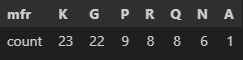

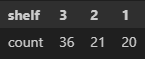

,count,unique,top,freq
mfr,77,7,K,23


mfr,K,G,P,R,Q,N,A
count,23,22,9,8,8,6,1


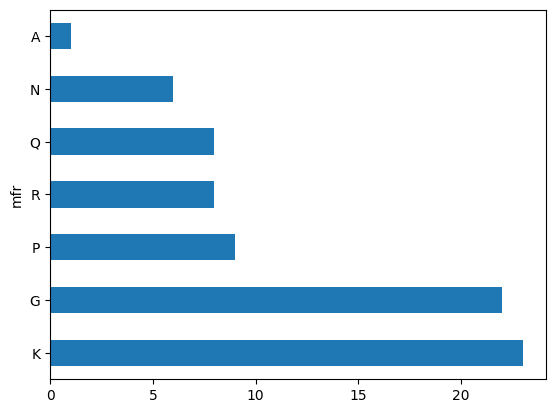

In [413]:
# Imprimieno estadísticas descriptiavs de MFR
display(obj_stats["mfr"].to_frame().T)

# Creando una gráfica de barras para contar las variables de 
cereals_df["mfr"].value_counts().plot(kind='barh')

# Imprimiendo cuenta de valores
cereals_df["mfr"].value_counts().to_frame().T

,count,mean,std,min,25%,50%,75%,max
shelf,77.0,2.207792,0.832524,1.0,1.0,2.0,3.0,3.0


shelf,3,2,1
count,36,21,20


Valores números de valores únicos de shelf: 3


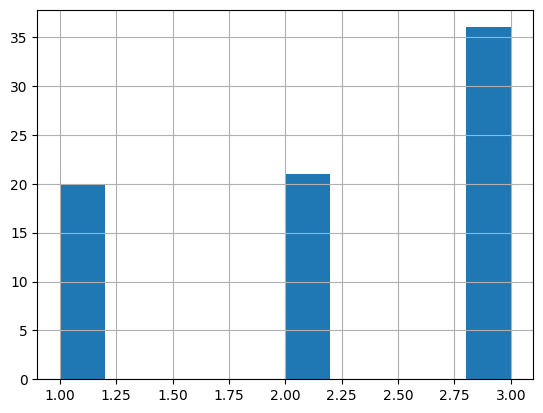

In [414]:
# Mostrando estadísticas descriptivas de "shelf"
display(num_stats["shelf"].to_frame().T)

# Graficando un histograma para ver la frecuencia de valores 
cereals_df["shelf"].hist()

# Imprime la cuenta de los distintos valores de shelf
display(cereals_df["shelf"].value_counts().to_frame().T)

# Contando valores diferentes de shelf
print("Valores números de valores únicos de shelf:", cereals_df["shelf"].nunique())

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

#### **Respuesta**

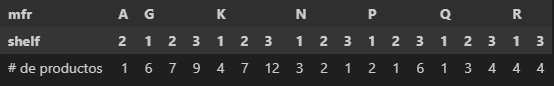

mfr             A  G        K         N        P        Q        R   
shelf           2  1  2  3  1  2   3  1  2  3  1  2  3  1  2  3  1  3
# de productos  1  6  7  9  4  7  12  3  2  1  2  1  6  1  3  4  4  4

<Axes: xlabel='mfr,shelf'>

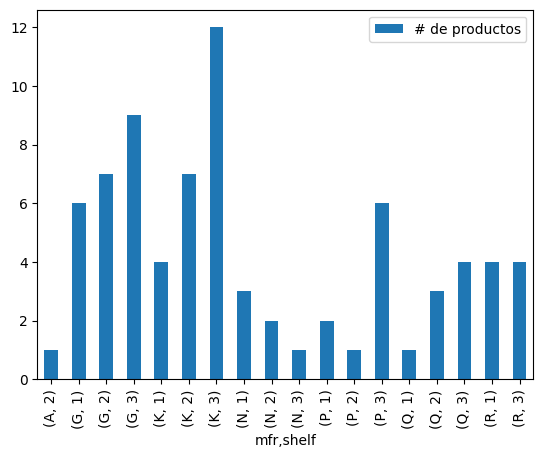

In [415]:
mfr = {"A": "American Home Food Products",
       "G": "General Mills",
       "K": "Kelloggs",
       "N": "Nabisco",
       "P": "Post",
       "Q": "Quaker Oats",
       "R": "Ralston Purina"}

tipo = {"C": "cold",
        "H": "hot"}

# Contando cuantos productos de cada marca "mfr" hay en cada "shelf"
conteo = cereals_df.groupby(['mfr', 'shelf']).size().to_frame()
conteo.columns = ["# de productos"]
display(conteo.T)

conteo.plot.bar()       


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

#### Respuesta
El rango más frecuente es de 30-40 en una escala de 0-100, con 

10    (18.041999999999998, 27.917]
12    (18.041999999999998, 27.917]
35    (18.041999999999998, 27.917]
18    (18.041999999999998, 27.917]
14    (18.041999999999998, 27.917]
                  ...             
63                (60.088, 93.705]
0                 (60.088, 93.705]
65                (60.088, 93.705]
64                (60.088, 93.705]
3                 (60.088, 93.705]
Name: rating, Length: 77, dtype: category
Categories (10, interval[float64, right]): [(18.041999999999998, 27.917] < (27.917, 31.104] < (31.104, 35.079] < (35.079, 37.418] ... (41.801, 49.199] < (49.199, 53.277] < (53.277, 60.088] < (60.088, 93.705]]

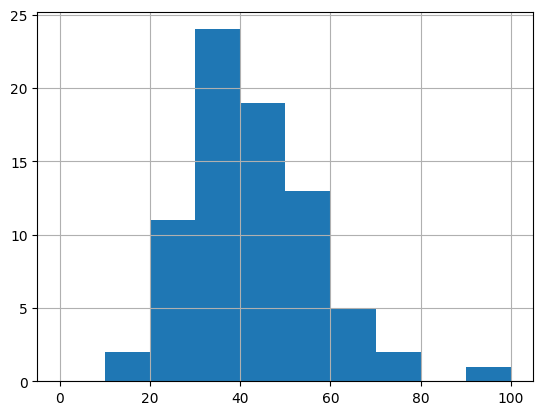

In [416]:
# Graficando en un histograma el rango del rating de 0-100
plot = cereals_df["rating"].hist(bins=range(0,101,10))
pd.qcut(cereals_df["rating"].sort_values(), 10)

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

In [417]:
# Ordenando los cereales por rating
cereal_rating_sorted = cereals_df.sort_values("rating",ascending=False).reset_index()

# Imprimiendo las 10 primeras filas con los datos de las colummnas de nombre, mfr y rating 
cereal_rating_sorted[["name","mfr","rating"]].head(10)

,name,mfr,rating
0,All-Bran_with_Extra_Fiber,K,93.704912
1,Shredded_Wheat_'n'Bran,N,74.472949
2,Shredded_Wheat_spoon_size,N,72.801787
3,100%_Bran,N,68.402973
4,Shredded_Wheat,N,68.235885
5,Cream_of_Wheat_(Quick),N,64.533816
6,Puffed_Wheat,Q,63.005645
7,Puffed_Rice,Q,60.756112
8,Nutri-grain_Wheat,K,59.642837
9,All-Bran,K,59.425505


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

<Axes: >

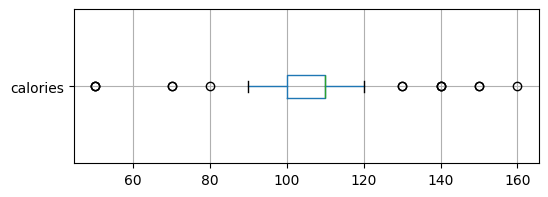

In [418]:
# Distribución general de calorías de los cereales 
cereals_df.boxplot(column="calories", vert=False, figsize=(6,2))

<Axes: title={'center': 'calories'}, xlabel='mfr'>

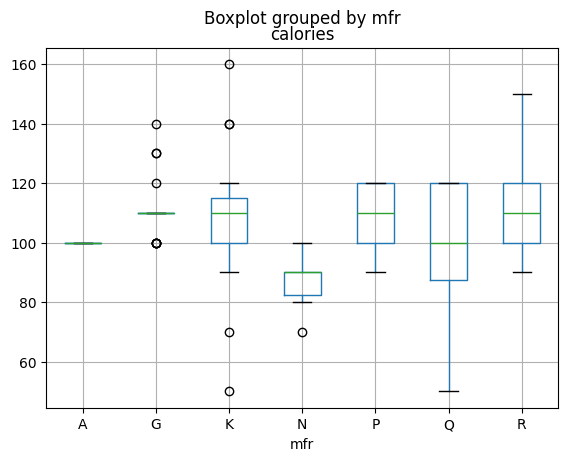

In [419]:
# Distribución de las calorias por fabricante
cereals_df.boxplot(column="calories", by="mfr")

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

#### **Respuesta**
Aquí podemos observar que las 2 variables que tienen mayor correlación ya sea positiva o negativa son:

* Sugar = -0.76
* Calories = -0.69

Eso indica que a mayor azucar y calorías, menor va a ser el rating.

<Axes: >

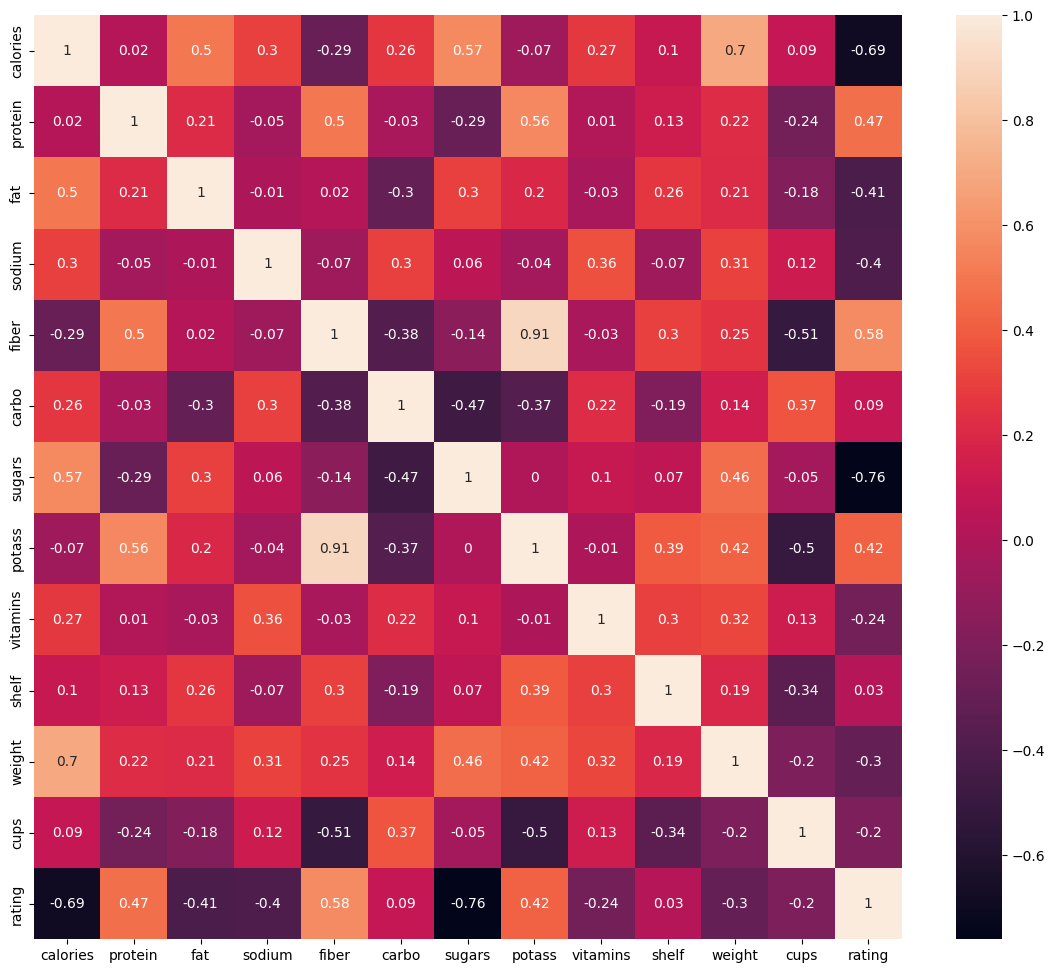

In [420]:
plt.figure(figsize = (14, 12))
sns.heatmap(round(cereals_df.corr(numeric_only=True),2), annot = True)

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [421]:
# Verificando que columnas tienen indices faltantes
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [422]:
# Eliminando cualquier fila que tenga algún registro con NaN y reinicio del dataframe
df_clean = cereals_df.dropna().reset_index(drop=True)
df_clean

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [423]:
y = df_clean["rating"]
x = df_clean.select_dtypes(include="number")

df_num = df_clean.select_dtypes(include="number")
df_cat = df_clean.select_dtypes(exclude="number")

In [424]:
"""
# Escalando valores numericos del data frame con Robust

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_clean.select_dtypes(include="number"))
df_scaled = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out()) 
df_scaled
"""

'\n# Escalando valores numericos del data frame con Robust\n\nfrom sklearn.preprocessing import RobustScaler\n\nscaler = RobustScaler()\nscaled_data = scaler.fit_transform(df_clean.select_dtypes(include="number"))\ndf_scaled = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out()) \ndf_scaled\n'

In [425]:
# Escalando valores numericos del data frame con Z-Score / Transformación gaussiana / Estandarización
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean.select_dtypes(include="number"))
df_scaled = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out()) 
df_scaled

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,0.948401,-0.202203,-2.099895,1.867565
1,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919,-0.601791
2,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,0.948401,-0.202203,-2.099895,1.223491
3,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763,3.682812
4,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-1.471657,-0.202203,-0.305922,-0.922781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.150841,-0.480589,0.0,1.066009,-0.903910,1.622199,-0.948852,-0.547081,-0.183083,0.948401,-0.202203,-0.305922,-0.234286
70,0.150841,-1.416474,0.0,-0.272050,-0.903910,-0.447503,1.129883,-1.044254,-0.183083,-0.261628,-0.202203,0.761919,-1.048780
71,-0.356533,0.455295,0.0,0.822725,0.342475,0.587348,-0.948852,0.234189,-0.183083,-1.471657,-0.202203,-0.647631,0.532024
72,-0.356533,0.455295,0.0,0.457800,0.342475,0.587348,-0.948852,0.163165,-0.183083,-1.471657,-0.202203,0.761919,0.661503


In [426]:
# Aplicando PCA (Principal Component Analysis) al data frame escalado
from sklearn.decomposition import PCA

pca = PCA()
num_data_pca = pca.fit_transform(df_scaled)
df_pca_df = pd.DataFrame(num_data_pca, columns=pca.get_feature_names_out())
x = df_pca_df
display(x)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12
0,5.746995,1.187545,-0.983893,0.421067,-1.176490,0.972466,0.223206,-0.243515,-0.135080,-0.049433,-0.250305,0.010701,1.022141e-08
1,0.411657,1.869310,-2.901420,-0.858535,3.271532,0.681940,0.962611,0.903571,-0.841989,0.594658,-0.067248,-0.094692,1.651188e-09
2,5.167720,1.504111,-0.102637,0.169396,-1.559672,1.996801,-0.415834,0.186687,0.140228,-0.084262,0.517210,-0.014985,1.473264e-08
3,7.856202,-0.241896,0.676601,0.467311,-1.770340,0.781378,0.698801,0.869826,-0.685784,-0.107987,-0.738824,0.076199,-1.928351e-08
4,-1.039034,0.365354,-1.466490,-0.909753,-0.407840,0.896077,0.006820,-0.794098,-0.744350,0.098973,-0.099616,-0.080442,1.728973e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-0.932746,-0.524195,1.240917,0.456362,0.738807,0.175343,-1.730326,0.690721,0.356374,0.020455,0.277696,0.124371,-1.142460e-08
70,-2.129542,-0.314586,-1.472949,0.380455,-0.382799,-0.158947,0.282965,0.264987,-0.038017,0.098138,-0.137801,0.102470,-6.659132e-09
71,0.652070,-0.750417,1.000348,-1.280324,-0.399678,0.643373,-0.641998,-0.610515,-0.597082,-0.110789,0.111905,0.057130,-4.097543e-09
72,0.331904,-1.153581,1.074313,-1.301855,-0.087910,0.515233,0.514320,0.011614,-0.602136,0.008435,-0.021665,0.025312,3.367443e-09


In [427]:
# Eigenvalues
eigenvalues = pd.DataFrame(pca.explained_variance_, columns=["Eigenvalues"])

# Porcentaje de variación
var_ratio = pd.DataFrame(pca.explained_variance_ratio_,columns=["Variance Ratio"])

# Unir ambos dataframes y mostrar
display(pd.concat([eigenvalues,var_ratio], axis=1).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Eigenvalues,3.683381,3.191179,1.935505,1.033442,1.002913,0.731953,0.680715,0.421925,0.320079,0.093071,0.064343,0.019576,2.279020e-16
Variance Ratio,0.279508,0.242158,0.146873,0.078421,0.076105,0.055543,0.051655,0.032017,0.024289,0.007063,0.004883,0.001485,1.729402e-17


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

#### **Respuesta**

Para tener un porcentaje de varianza acumulada de 90% necesitamos un mínimo de 6 componentes, para el caso con datos escalados por medio de Z-score.

,0,1,2,3,4,5,6,7,8,9,10,11,12
PCA Variance Ratio Acumulado,27.95,52.17,66.85,74.7,82.31,87.86,93.03,96.23,98.66,99.36,99.85,100.0,100.0


Text(0.5, 0, 'Número de Componentes')

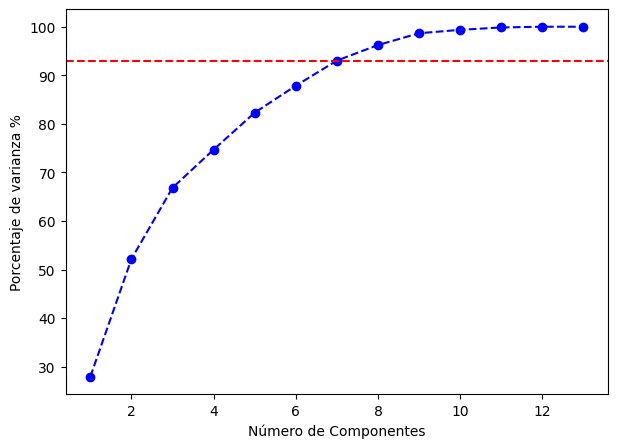

In [428]:
# Obteniendo el radio de valores PCA, sumandolos, redondeandolos a 4 decimales y obteniendo el porcentaje
PCA_var_ratio = pca.explained_variance_ratio_.cumsum().round(4) * 100
# Pasando el el array PCA a un data frame y visualizarlo
PCA_var_ratio_accum = pd.DataFrame(PCA_var_ratio, columns=["PCA Variance Ratio Acumulado"])
display(PCA_var_ratio_accum.T)

# Graficando el análisis PCA
plt.figure(figsize=(7,5))
plt.scatter(range(1, len(PCA_var_ratio) + 1), PCA_var_ratio, color='blue', label='Varianza Explicada')
plt.plot(range(1, len(PCA_var_ratio) + 1), PCA_var_ratio, color='blue', linestyle = "dashed")
plt.axhline(PCA_var_ratio[6], linestyle = "dashed", color="red")
plt.ylabel("Porcentaje de varianza %")
plt.xlabel("Número de Componentes")

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


#### **Respuesta**
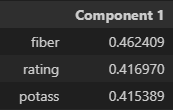

In [429]:
# Valor absoluto de los eigenvectors. Entre mayor sea el número, tiene más influencia en dicha componente
pca_comp_df = pd.DataFrame(abs(pca.components_), columns=df_num.columns, index= ["Component " + str(num) for num in range(1,len(PCA_var_ratio_accum)+1)])
pca_comp_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
Component 1,0.299542,0.307356,0.039915,0.183397,0.453490,0.192449,0.228068,0.401964,0.115980,1.712634e-01,5.029930e-02,2.946355e-01,0.438378
Component 2,0.393148,0.165323,0.345724,0.137221,0.179812,0.149448,0.351434,0.300544,0.172909,2.650503e-01,4.503085e-01,2.122479e-01,0.251539
Component 3,0.114857,0.277282,0.204890,0.389431,0.069766,0.562452,0.355405,0.067620,0.387859,1.531036e-03,2.471383e-01,1.399997e-01,0.181842
Component 4,0.204359,0.300743,0.186833,0.120337,0.039174,0.087835,0.022707,0.090878,0.604111,6.388786e-01,1.534287e-01,4.748909e-02,0.038316
Component 5,0.203899,0.319749,0.586893,0.338364,0.255119,0.182743,0.314872,0.148360,0.049287,3.291013e-01,2.212833e-01,1.208164e-01,0.057584
Component 6,0.255906,0.120752,0.347967,0.664372,0.064244,0.326393,0.152082,0.025154,0.129486,5.204414e-02,3.987737e-01,9.946094e-02,0.186145
Component 7,0.025595,0.282705,0.051155,0.283703,0.112325,0.260468,0.227985,0.148808,0.294276,1.748344e-01,1.392058e-02,7.485668e-01,0.063445
Component 8,0.002477,0.426632,0.063050,0.176720,0.216216,0.167436,0.063088,0.262222,0.457041,4.141458e-01,7.524765e-02,4.989590e-01,0.014945
Component 9,0.029909,0.534718,0.459688,0.215103,0.244333,0.116807,0.225384,0.166513,0.346151,4.161989e-01,6.507258e-02,4.952533e-02,0.063274
Component 10,0.499532,0.021566,0.145087,0.001091,0.295107,0.240557,0.251659,0.177221,0.052295,4.610229e-02,6.915985e-01,7.705936e-02,0.012235


In [430]:
# Features que más impactan al primer componente
comp_1_features = pca_comp_df.iloc[0].to_frame()

# Ordenando los features e imprimiendo
comp_1_features_ordered = comp_1_features.sort_values("Component 1", ascending=False)
comp_1_features_ordered

,Component 1
fiber,0.453490
rating,0.438378
potass,0.401964
protein,0.307356
calories,0.299542
cups,0.294636
sugars,0.228068
carbo,0.192449
sodium,0.183397
shelf,0.171263


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

#### **Respuesta**

Tenemos 3 variables categóricas:
* name
* mfr
* type

De estas variables el nombre no es un buen predictor, ya que es una propiedad con una cardinalidad muy alta, ya que el nombre de cada cereal es distinto. Esto no describiría bien la relación de esta variable con las demás porque no existe ningún patrón.

In [431]:
# Recordar que MFR y Type tinen estos significados
mfr = {"A": "American Home Food Products",
       "G": "General Mills",
       "K": "Kelloggs",
       "N": "Nabisco",
       "P": "Post",
       "Q": "Quaker Oats",
       "R": "Ralston Purina"}

tipo = {"C": "cold",
        "H": "hot"}

df_cat

,name,mfr,type
0,100%_Bran,N,C
1,100%_Natural_Bran,Q,C
2,All-Bran,K,C
3,All-Bran_with_Extra_Fiber,K,C
4,Apple_Cinnamon_Cheerios,G,C
...,...,...,...
69,Triples,G,C
70,Trix,G,C
71,Wheat_Chex,R,C
72,Wheaties,G,C


#### **Respuesta**
Dado que no se tiene una cardinalidad muy alta de las variables MFR y TYPE, se utilizará la codificación One-hot, para que las variables puedan ser más fáciles de identificar. Así mismo no son variables que puedan ser orinales, por lo que no se les puede asignar un valor predeterminado.

In [432]:
# Seleccionando columnas a codificar
df_cat_sel = df_cat[["mfr","type"]]

# Códificando en One-hot las variables categóricas
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_cat_sel.reset_index())
df_cat_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
df_cat_encoded = df_cat_encoded.drop(columns=df_cat_encoded.columns[:len(df_cat_sel)])
df_cat_encoded

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
69,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
72,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [433]:
# Juntando data frames
df_out = pd.concat([x[x.columns[0:7]], df_cat_encoded, y], axis=1)
df_out

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H,rating
0,5.746995,1.187545,-0.983893,0.421067,-1.176490,0.972466,0.223206,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,68.402973
1,0.411657,1.869310,-2.901420,-0.858535,3.271532,0.681940,0.962611,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33.983679
2,5.167720,1.504111,-0.102637,0.169396,-1.559672,1.996801,-0.415834,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,59.425505
3,7.856202,-0.241896,0.676601,0.467311,-1.770340,0.781378,0.698801,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,93.704912
4,-1.039034,0.365354,-1.466490,-0.909753,-0.407840,0.896077,0.006820,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-0.932746,-0.524195,1.240917,0.456362,0.738807,0.175343,-1.730326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.106174
70,-2.129542,-0.314586,-1.472949,0.380455,-0.382799,-0.158947,0.282965,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.753301
71,0.652070,-0.750417,1.000348,-1.280324,-0.399678,0.643373,-0.641998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,49.787445
72,0.331904,-1.153581,1.074313,-1.301855,-0.087910,0.515233,0.514320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51.592193


In [434]:
# Guardando data frame resultante en un archivo
df_out.to_csv('df_out.csv', index=True)